In [7]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        #TODO
        return 0

    def rotate_left(self):
        #TODO
        return 0
                    
        
    

In [8]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        #You may alter code in this method if you wish, it's merely a guide.
        if node.parent == None:
            node.make_black()
        # while node != None and node.parent != None and node.parent.is_red(): 
            #TODO
        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [9]:
import math
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Part 2.1

# k = log(n)
# k = log(1 000) = 10
# arrays = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512  # lengths

class BSearch_Fast():
    def __init__(self, items_in: list):
        items_in.sort()
        items = list(items_in)
        self.n = len(items)
        # calculate k value and init lists
        k = math.ceil(math.log2(self.n+1))
        self.lists = [[] for _ in range(k)]

        # find the equivalent binary number
        n_in_binary = str(bin(self.n)[2:][::-1])
        idx = 0
        for i in range(k):
            if n_in_binary[i] == '1':
                for _ in range(2**i):
                    # add items to list if the digit is '1'
                    if (idx >= len(items)): break
                    self.lists[i].append(items[idx])
                    idx += 1

    def get_lists(self):
        return self.lists

    def search(self, to_find):
        # iterate over all lists and bsearch on them
        for item_list in self.lists:
            if (len(item_list) > 0):
                found = self.__bsearch_helper(item_list, to_find)
                if found != -1: return True
        return False

    def __bsearch_helper(self, item_list, to_find):
        # straightforward binary search
        if len(item_list) == 0:
            return -1

        lower=0
        upper=len(item_list)-1
        while lower < upper:
            mid = (lower+upper)//2
            if item_list[mid] == to_find:
                return mid
            if item_list[mid] < to_find:
                lower = mid+1
            else:
                upper=mid
        if item_list[lower]==to_find:
            return lower
        return -1
 
    def insert(self, item):
        self.lists[0].append(item)
        if len(self.lists[0]) == 1: # no need to modify lists
            return True
        
        # initialize combine_lists
        combine_lists = self.lists[0]

        # while searching for empty list, add current list
        idx = 1
        while len(self.lists[idx]) > 0:
            combine_lists += list(self.lists[idx])
            idx += 1
            if (idx == len(self.lists)): break
        
        # we need another list
        if idx == len(self.lists):
            self.lists.append([])
        
        # combine the previous lists and sort
        self.lists[idx] = list(combine_lists)
        self.lists[idx].sort()
        # clear out all previous lists
        for i in range(idx):
            self.lists[i] = []

        return item

    def delete(self, item):
        # find the idx of the lowest non-empty list
        idx = 0
        while len(self.lists[idx]) == 0:
            idx += 1
            if (idx == len(self.lists)): break

        found = False
        search_idx = idx
        # find item and delete
        while not found:
            search = self.__bsearch_helper(self.lists[search_idx], item)

            # item found, now delete
            if (search != -1):
                found = True
                self.lists[search_idx].pop(search)

                # must take an item from the smallest non-empty list
                # and place into the list with the deleted item
                if (search_idx != idx):
                    fix_hole = self.lists[idx].pop()
                    self.lists[search_idx].append(fix_hole)
                    self.lists[search_idx].sort()
                break
            else:
                search_idx += 1
                if search_idx == len(self.lists): break

        if found and search_idx != 0:
            # move the disrupted list into all the smaller, empty lists
            if (idx != 0):
                self.lists[0].append(self.lists[idx][0])
            for i in range(1, idx):
                self.lists[i] = self.lists[idx][2**(i)-1:(2**(i+1))-1]
            # clear the first non-empty list
            if (idx != 0):
                self.lists[idx] = []
                if len(self.lists[-1]) == 0:
                    self.lists.pop()
        
        return found

test = BSearch_Fast([i for i in range(25)])
print(test.search(13))
print(test.get_lists())

True
[[0], [], [], [1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]


In [11]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

def binary_search_4(item_list, to_find, left, right):
    if left == right:
        return item_list[left] == to_find
    mid = (left+right)//2
    if item_list[mid] < to_find:
        return binary_search_4(item_list, to_find, mid+1, right)
    return binary_search_4(item_list, to_find, left, mid)

def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

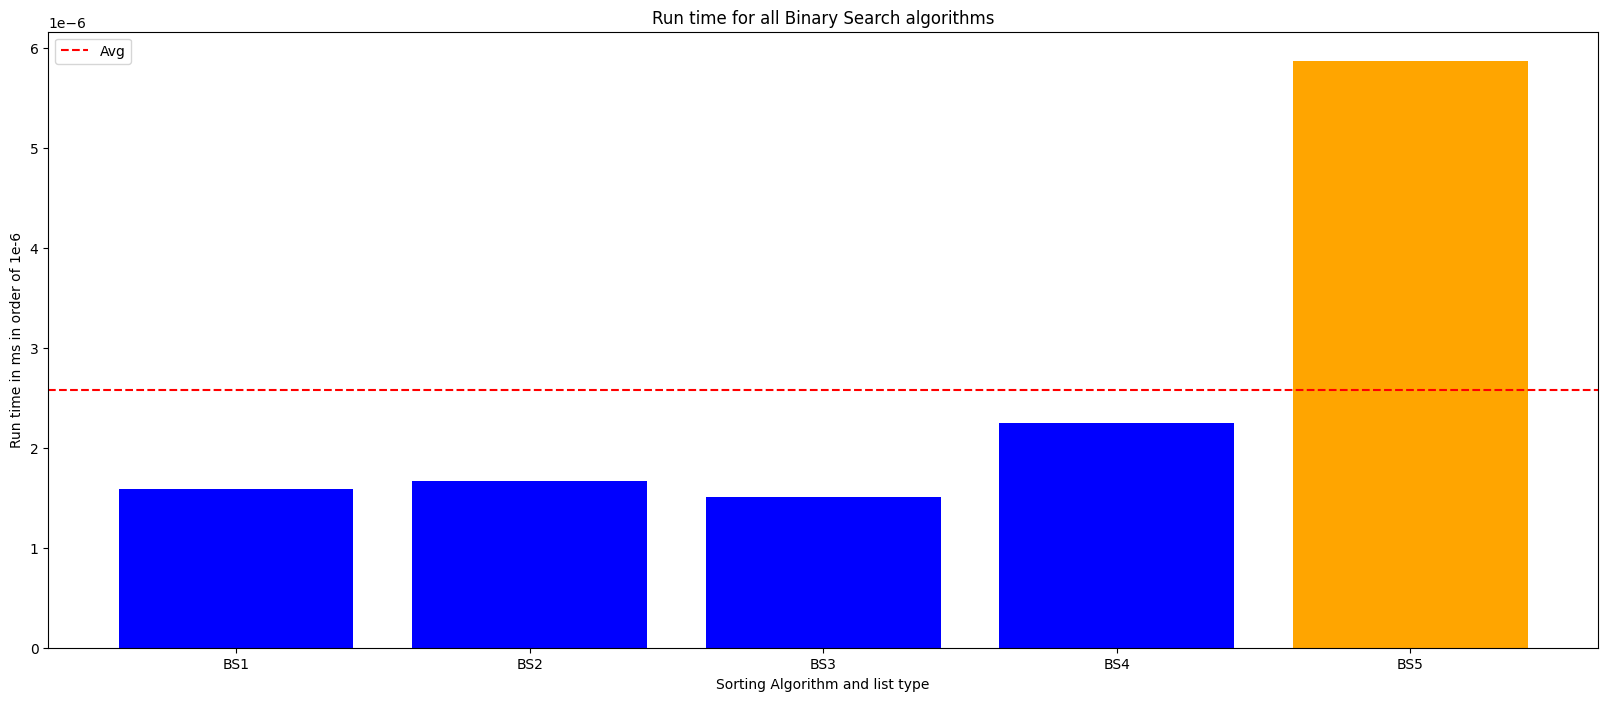

In [12]:
sorted_lists = []

for i in range(50):
    sorted = create_custom_list(5000, 20000)
    sorted.sort()
    sorted_lists.append(sorted)

def bs_1_speed(list, num):
    start = timeit.default_timer()
    binary_search_1(list, num)
    end = timeit.default_timer()
    return end-start
def bs_2_speed(list, num):
    start = timeit.default_timer()
    binary_search_2(list, num)
    end = timeit.default_timer()
    return end-start
def bs_3_speed(list, num):
    start = timeit.default_timer()
    binary_search_3(list, num)
    end = timeit.default_timer()
    return end-start
def bs_4_speed(list, num):
    left = 0
    right = len(list)-1
    start = timeit.default_timer()
    binary_search_4(list, num, left, right)
    end = timeit.default_timer()
    return end-start
def bs_5_speed(list, num):
    bsearch = BSearch_Fast(list)
    start = timeit.default_timer()
    bsearch.search(num)
    end = timeit.default_timer()
    return end-start

speeds = [[] for _ in range(5)]
for sorted_list in sorted_lists:
    rs = [random.randint(1, 20000) for _ in range(10)]

    for i in range(len(rs)):
        speeds[0].append(bs_1_speed(list(sorted_list), rs[i]))
        speeds[1].append(bs_2_speed(list(sorted_list), rs[i]))
        speeds[2].append(bs_3_speed(list(sorted_list), rs[i]))
        speeds[3].append(bs_4_speed(list(sorted_list), rs[i]))
        speeds[4].append(bs_5_speed(list(sorted_list), rs[i]))


def draw_binary_search_speeds(run_arr, x_axis):
    x = np.arange(0, len(run_arr), 1)
    plt.figure(figsize=(20, 8))
    plt.bar(x[:4], run_arr[:4], color='blue')
    plt.bar(x[4:], run_arr[4:], color='orange')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xticks(x, x_axis)
    plt.xlabel("Algorithm Type")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title("Run time for all Binary Search algorithms")
    plt.legend()
    plt.show()

for i in range(5):
    speeds[i] = sum(speeds[i]) / len(speeds[i])

bs_xaxis = ['BS1', 'BS2', 'BS3', 'BS4', 'Dynamic Binary Search']
draw_binary_search_speeds(speeds, bs_xaxis)

**Reflection**:

For our experiments, we are testing the algorithms on 50 sorted lists (5000 numbers), with 10 randomn numbers each time. <br>
As one would expect with our new overhead, the new binary search is slower. Instead of having just one array to check we have up to logn arrays to check. In the grand scheme of things this is not really a problem since any algorithm that is able to run in logn time is already incredibly fast.

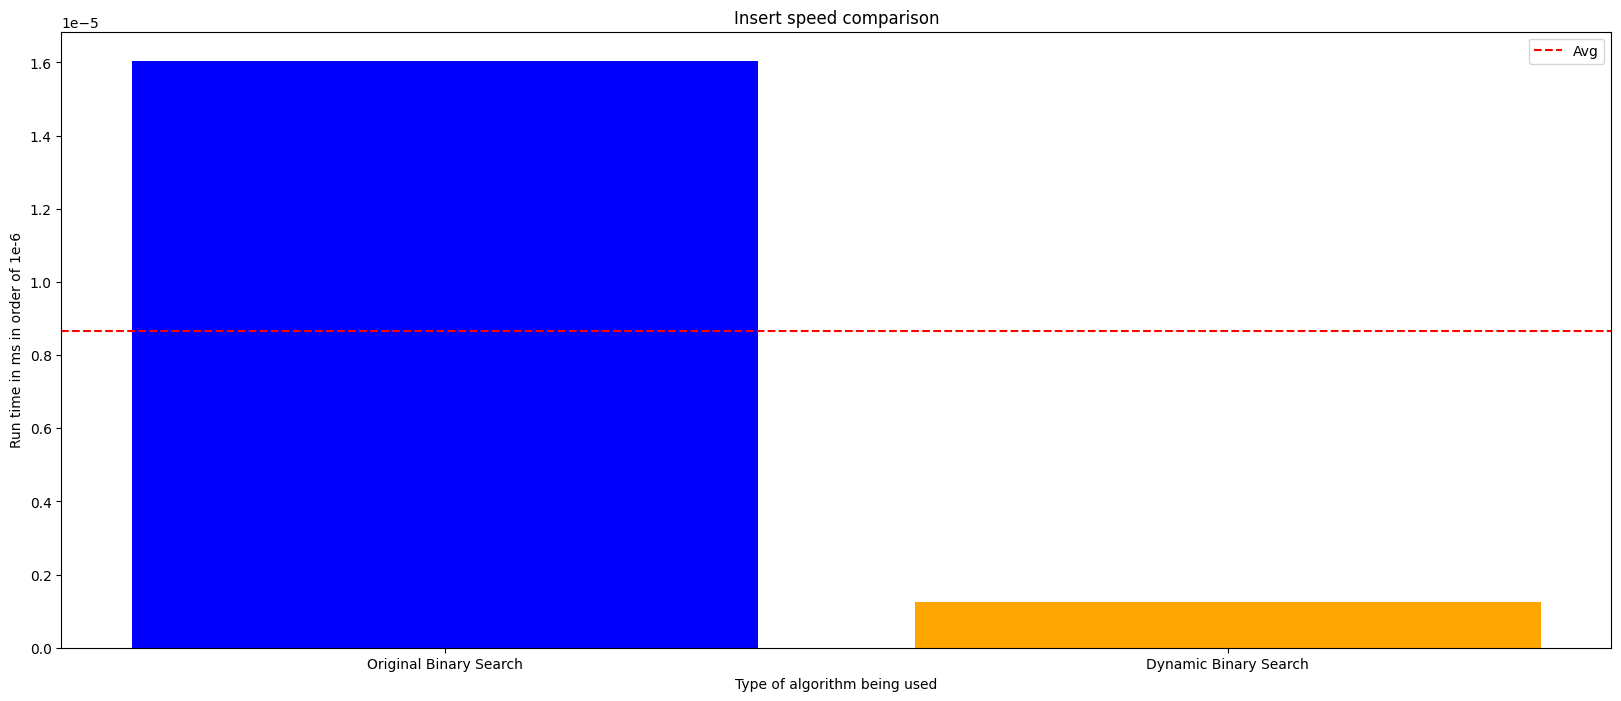

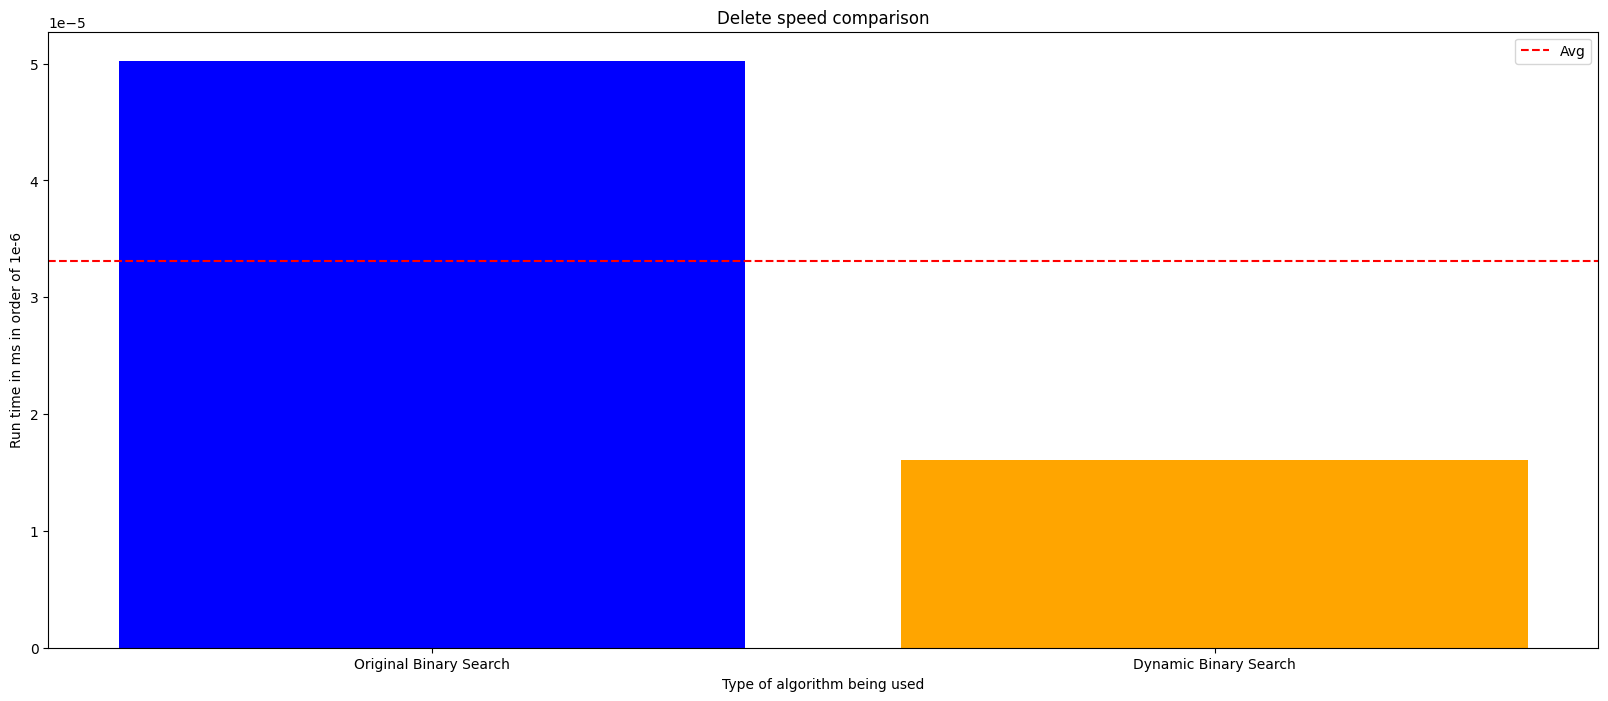

In [31]:

def default_bs_speed_insert(items: list, num):
    start = timeit.default_timer()

    items.append(num)
    items.sort()

    binary_search_1(items, num)
    end = timeit.default_timer()
    return end-start

def dynamic_bs_speed_insert(list, num):
    bsearch = BSearch_Fast(list)
    start = timeit.default_timer()
    bsearch.insert(num)
    bsearch.search(num)
    end = timeit.default_timer()
    return end-start

def default_bs_speed_delete(items: list, num):
    start = timeit.default_timer()
    if (num not in items):
        items.append(num)
        items.sort()
    else:
        items.remove(num)

    binary_search_1(items, num+1)
    end = timeit.default_timer()
    return end-start

def dynamic_bs_speed_delete(list, num):
    bsearch = BSearch_Fast(list)
    start = timeit.default_timer()
    bsearch.delete(num)
    bsearch.search(num+1)
    end = timeit.default_timer()
    return end-start

speeds_2 = [[], []]
speeds_3 = [[], []]
for sorted_list in sorted_lists:
    rs = [random.randint(1, 20000) for _ in range(10)]

    for i in range(len(rs)):
        speeds_2[0].append(default_bs_speed_insert(list(sorted_list), rs[i]))
        speeds_2[1].append(dynamic_bs_speed_insert(list(sorted_list), rs[i]))
        speeds_3[0].append(default_bs_speed_delete(list(sorted_list), rs[i]))
        speeds_3[1].append(dynamic_bs_speed_delete(list(sorted_list), rs[i]))


def draw_insert_speed(title, run_arr, x_axis):
    x = np.arange(0, len(run_arr), 1)
    plt.figure(figsize=(20, 8))
    plt.bar(x[:1], run_arr[:1], color='blue')
    plt.bar(x[1:], run_arr[1:], color='orange')
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xticks(x, x_axis)
    plt.xlabel("Type of algorithm being used")
    plt.ylabel("Run time in ms in order of 1e-6")
    plt.title(title)
    plt.legend()
    plt.show()

speeds_2[0] = sum(speeds_2[0]) / len(speeds_2[0])
speeds_2[1] = sum(speeds_2[1]) / len(speeds_2[1])
speeds_3[0] = sum(speeds_3[0]) / len(speeds_3[0])
speeds_3[1] = sum(speeds_3[1]) / len(speeds_3[1])

bs_xaxis = ['Original Binary Search', 'Dynamic Binary Search']

draw_insert_speed("Insert speed comparison", speeds_2, bs_xaxis)
draw_insert_speed("Delete speed comparison", speeds_3, bs_xaxis)

**Reflection**:

Again we're running 50 experiments. <br>
We've significantly improved the time for insert and delete! This makes sense as we are dealing with list sizes that are a fraction of the size of the overall list size, and since we're dealing with O(n) operations this can save quite a bit of time. Any time lost for our binary search is now being recouped. <br>
An interesting note is that the startup times for this dynamic binary search are quite significant. We see a massive slowdown if we include these in our timings. So much that the original binary search would then significantly beat the dynamic versions.